<h3>Dimensionality Reduction using PCA and LDA using Scikit Learn</h3>

<h5>Principal Component Analysis</h5>

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('darkgrid')
plt.rcParams['figure.figsize'] = (10, 8)

In [7]:
iris_df = sns.load_dataset('iris')
iris_df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [8]:
# Creating a features set
x = iris_df.drop(['species'], axis=1)

# Creating the labels set
y = iris_df['species']

# Converting the labels to numbers
from sklearn import preprocessing

le = preprocessing.LabelEncoder()
y = le.fit_transform(y)

In [9]:
# Dividing data into 80% - 20% training and test sets
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [10]:
# Applying scaling on the training and test sets
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [11]:
# Importing PCA class
from sklearn.decomposition import PCA

# Creating an object of the PCA class
pca = PCA()

# Training a PCA model on training data
x_train = pca.fit_transform(x_train)

# Making predictions on the test data
x_test = pca.transform(x_test)

In [13]:
# Printing the variance ratios
variance_ratios = pca.explained_variance_ratio_
print(variance_ratios)

[0.72551423 0.23000922 0.03960774 0.00486882]


In [14]:
# Using one principal component
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
x_train = pca.fit_transform(x_train)
x_test = pca.transform(x_test)

In [15]:
# Making predictions using Logistic Regression
from sklearn.linear_model import LogisticRegression

# Training the logistic regression model
lg = LogisticRegression()
lg.fit(x_train, y_train)

# Predicting the Test set results
y_pred = lg.predict(x_test)


# Evaluating the results
from sklearn.metrics import accuracy_score

print(accuracy_score(y_test, y_pred))

0.9


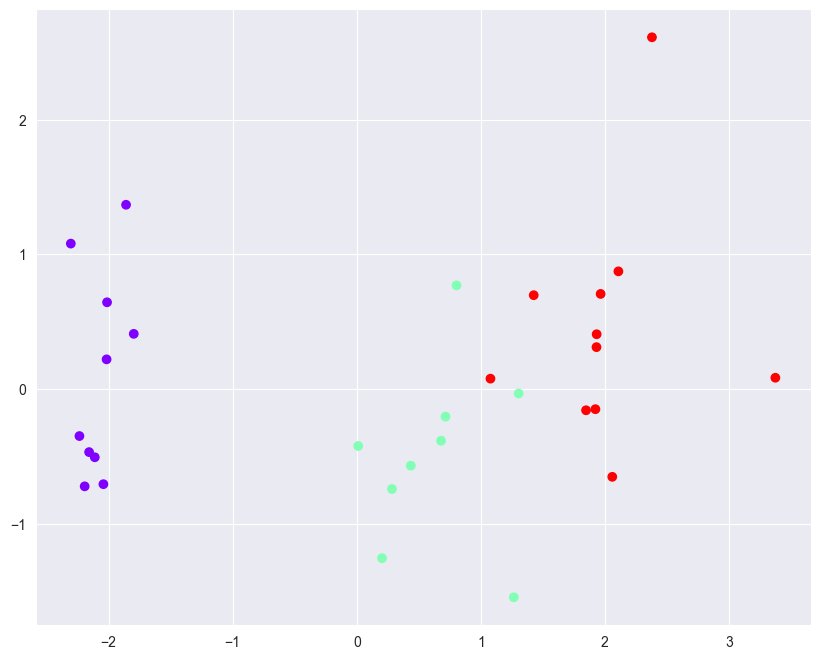

In [16]:
plt.scatter(x_test[:, 0], x_test[:, 1], c=y_test, cmap='rainbow')

<h5>Linear Discriminant Analysis</h5>

In [17]:
banknote_df = pd.read_csv('./datasets/banknote.csv')
banknote_df.head()

,variance,skewness,curtosis,entropy,class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


In [18]:
# Dividing data into features and labels
x = banknote_df.drop(['class'], axis=1)
y = banknote_df['class']

In [19]:
# Dividing the data into training and test sets
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [21]:
# Applying scaling on the training and test data
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

c:\Users\JohnWork\Documents\Projects\Python\scikit_learn_refresher\venv\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


In [22]:
# Importing the LDA class
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

# Creating object of the LDA class
lda = LDA()

# Training PCA model on training data
x_train = lda.fit_transform(x_train, y_train)

# Making predictions on the test data
x_test = lda.transform(x_test)

In [23]:
# Printing variance ratios
variance_ratios = lda.explained_variance_ratio_
print(variance_ratios)

[1.]


In [24]:
# Creating object of the LDA class
lda = LDA(n_components=1)

# Training PCA model on the training data
x_train = lda.fit_transform(x_train, y_train)

# Making predictions on the test data
x_test = lda.transform(x_test)

In [25]:
# Making predictions using logistic regression
from sklearn.linear_model import LogisticRegression

# Training the logistic regression model
lg = LogisticRegression()
lg.fit(x_train, y_train)

# Predicting the test set results
y_pred = lg.predict(x_test)

# Evaluating the results
from sklearn.metrics import accuracy_score

print(accuracy_score(y_test, y_pred))

0.7672727272727272


<h5>Singular Value Decomposition</h5>

In [26]:
wine_data = pd.read_csv('./datasets/winequality-red.csv')
wine_data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [27]:
# Creating the feature set
x = wine_data.drop(['quality'], axis=1)
y= wine_data.quality

In [28]:
# Dividing the data into 80%-20% training test set
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

print(x_train.shape)
print(y_train.shape)

(1276, 11)
(1276,)


In [29]:
# Applying scaling in the training and test data
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [30]:
# Making predictions using logistic regression
from sklearn.linear_model import LogisticRegression

# Training the logistic regression model
lg = LogisticRegression()
lg.fit(x_train, y_train)

# Predicting the test set results
y_pred = lg.predict(x_test)

# Evaluating the results
from sklearn import metrics
import numpy as np

print("Mean Absolute Error", metrics.mean_absolute_error(y_test, y_pred))
print("Mean Squared Error", metrics.mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error", np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error 0.48125
Mean Squared Error 0.55
Root Mean Squared Error 0.7416198487095663


In [31]:
# Importing TruncatedSVD class
from sklearn.decomposition import TruncatedSVD

# Creating an object of TruncatedSVD class
svd = TruncatedSVD()

# Training the SVD model on the training data
x_train = svd.fit_transform(x_train)

# Making predictions on the test data
x_test = svd.transform(x_test)

print(x_train.shape)
print(x_test.shape)

(1276, 2)
(320, 2)


In [32]:
# Making predictions using Logistic Regression
from sklearn.linear_model import LogisticRegression

lg = LogisticRegression()
lg.fit(x_train, y_train)

y_pred = lg.predict(x_test)

from sklearn import metrics
import numpy as np

print("Mean Absolute Error: ", metrics.mean_absolute_error(y_test, y_pred))
print("Mean Squared Error: ", metrics.mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error: ", np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error:  0.525
Mean Squared Error:  0.64375
Root Mean Squared Error:  0.8023403267940606
